<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
from datetime import date
mydate = date.today().strftime("%d. %B %Y")
print("por Rafael Borneo, Hugo Carignano, Gabriel Crisnejo y Gastón Valvassori,",mydate)

por Rafael Borneo, Hugo Carignano, Gabriel Crisnejo y Gastón Valvassori, 26. May 2021


In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [5]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [6]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang.head(3)

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,"[assembler, bash/shell, c, c#, python, r]"


# Hasta aquí fue el pre-procesado de los datos realizado por los profes de la diplomatura

Trabajaremos a partir del data set df_lang

In [10]:
df_lang.head(10)

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

$----------------------------------------------------------$

# Resolución

1. Seleccionar las columnas relevantes para analizar.

R: Las columnas relevantes para nuestro análisis serán las columnas `'programming_language'` y `'salary_monthly_NETO'`.

In [11]:
df_cured = df_lang[['programming_language','salary_monthly_NETO']]
print('Número de filas: ',len(df_cured))
df_cured.head(5)

# llamamos df_cured a nuestro data set

Número de filas:  18000


,programming_language,salary_monthly_NETO
0,ninguno,43000.0
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
2,ninguno,127000.0


$----------------------------------------------------------$

2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

## Primero descartamos las filas donde no tenemos datos. Es decir vemos primero cuántos NaN hay en la columna  `'salary_monthly_NETO'` y los extraemos del data set

In [12]:
print("El data set 'df_cured' tiene",len(df_cured),"filas")
print('Este DataSet tenía: ',\
      df_cured['salary_monthly_NETO'].isnull().sum()\
      ,"filas con NaN en la columna 'salary_monthly_NETO'.")

# Extraemos esas filas de nuestro data set
df_cured = df_cured.dropna()

print('Descartamos las filas con NaN.')
len_dataset_original = len(df_cured)
print('Ahora nuestro data set tiene',len_dataset_original,'filas')

df_cured.head(10)

El data set 'df_cured' tiene 18000 filas
Este DataSet tenía:  647 filas con NaN en la columna 'salary_monthly_NETO'.
Descartamos las filas con NaN.
Ahora nuestro data set tiene 17353 filas


,programming_language,salary_monthly_NETO
0,ninguno,43000.0
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
2,ninguno,127000.0
3,bash/shell,102000.0
3,c,102000.0
3,css,102000.0
3,html,102000.0
3,java,102000.0


Agrupemos la información por lenguaje de programación para ver de otra forma los datos.
Ademas calculamos algunos estadísticos simples como la media, la desviación estándar, algunos percentiles (25, 50, 75), mínimo y máximo.

In [13]:
groups = df_cured.groupby('programming_language')['salary_monthly_NETO'].describe()
groups

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
,5.0,63718.000000,28508.378067,32000.0,36590.0,72000.0,80000.0,98000.0
(mule),1.0,32125.000000,NaN,32125.0,32125.0,32125.0,32125.0,32125.0
(programación,1.0,82307.000000,NaN,82307.0,82307.0,82307.0,82307.0,82307.0
-,4.0,70500.000000,12288.205727,58000.0,61750.0,69500.0,78250.0,85000.0
.,1.0,50000.000000,NaN,50000.0,50000.0,50000.0,50000.0,50000.0
...,...,...,...,...,...,...,...,...
xslt,2.0,23050.000000,32456.201256,100.0,11575.0,23050.0,34525.0,46000.0
y,3.0,45005.666667,41300.180343,42.0,26883.5,53725.0,67487.5,81250.0
yacc,1.0,99000.000000,NaN,99000.0,99000.0,99000.0,99000.0,99000.0


Ordenemos provisoriamente cada lenguaje desde los más populares a los menos populares.

In [14]:
groups.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,2409.0,100349.853843,105451.265044,1.0,51981.0,80000.0,110000.0,2080000.0
sql,2088.0,92165.221091,92998.721321,1.0,51490.0,77000.0,105000.0,2080000.0
html,1793.0,91807.318308,99073.204525,1.0,50000.0,73000.0,100500.0,2080000.0
python,1417.0,110805.045791,109543.982954,1.0,61400.0,89000.0,120000.0,1500000.0
java,1405.0,99769.704651,88719.871241,1.0,57650.0,86000.0,119000.0,2080000.0
...,...,...,...,...,...,...,...,...
pascal,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
elm,1.0,690000.000000,NaN,690000.0,690000.0,690000.0,690000.0,690000.0
en,1.0,82307.000000,NaN,82307.0,82307.0,82307.0,82307.0,82307.0


Agrupando la información de esta forma podemos observar varias cosas.

1- Tenemos 203 lenguajes de programación distintos (incluyendo la información de cuántas personas no saben
ningún lenguaje, es decir, lenguaje 'ninguno').

2- Tenemos lenguajes (e.g. javascript) donde la desviación estándar es muy alta, el valór mínimo es claramente un valor irreal (min=1 en este ejemplo) y el valor máximo es muy grande. Por lo tanto, nos restringiremos a casos donde las personas ganen más de cierto valor, por ejemplo más de $10000; y donde el valor reportado del salario esté cerca del valor medio de salarios del data set (ver función clean_outliers_sd).

3- Hay lenguajes de programación súmamente 'impopulares', con count=1,2,3,4,etc.; lo cual nos hace desconfiar
de que los valores en la columna 'salary_monthly_NETO' sean representativos de cuánto gana la gente que sabe
dicho lenguaje. Por lo tanto, asumiremos una línea de corte a partir de la cual sólo consideraremos lenguajes con counts que superen dicha línea (e.g, sólo consideraremos lenguajes con count > 10).


In [15]:
# def clean_outliers_sd(dataset, column_name):
#     """Returns dataset removing the outlier rows from column @column_name."""
#     interesting_col = dataset[column_name]
#     # Here we can remove the outliers from both ends, or even add more restrictions.
#     mask_outlier = (
#         np.abs(interesting_col - interesting_col.mean()) <= (2.0 * interesting_col.std()))
#     return dataset[mask_outlier]

def clean_outliers_sd(dataset, column_name, k):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (k * interesting_col.std()))
    return dataset[mask_outlier]

In [16]:
# Aquí limpiamos los outliers

salario_minimo = 10000.
count_minimo = 10.
k_salary = 2.

df_cured = df_cured[df_cured['salary_monthly_NETO']>salario_minimo]
df_cured = clean_outliers_sd(df_cured, 'salary_monthly_NETO',k_salary)
df_cured = df_cured[df_cured.groupby('programming_language')\
                    .programming_language.transform(len) > count_minimo]


groups = df_cured.groupby('programming_language')['salary_monthly_NETO'].describe()
groups.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,2239.0,88701.312407,50932.532476,11000.00,54000.000,80000.00,106000.00,312000.0
sql,1969.0,84888.574611,45106.907172,12000.00,53250.000,78000.00,103000.00,310000.0
html,1671.0,82937.399515,47459.705425,12000.00,51100.000,74000.00,100000.00,310000.0
java,1339.0,94692.954108,49058.446695,11000.00,60000.000,87000.00,117000.00,310000.0
python,1334.0,97747.041754,51890.871803,10700.00,62758.465,88600.00,118000.00,312000.0
css,1114.0,81780.017765,46036.935547,12000.00,50000.000,72800.00,100000.00,310000.0
bash/shell,909.0,95615.003806,47515.718466,14000.00,62000.000,89500.00,115000.00,310000.0
php,803.0,84929.517472,49843.374507,13894.17,50000.000,75000.00,105000.00,300000.0
.net,752.0,85660.815585,47247.500451,11000.00,54000.000,78000.00,104250.00,310000.0


In [17]:
print('Notemos que luego de curar los datos nos quedaron', len(groups), 'lenguajes de progamación distintos.')
print('Por otro lado, nuestro data set original tenía', len_dataset_original, 'observaciones (filas).')
len_dataset_cured = len(df_cured)
print('Luego de curar los datos nos quedaron', len_dataset_cured, 'observaciones.')
print('Por lo tanto hemos conservado el',"{:.2f}".format(len_dataset_cured/len_dataset_original*100),\
      '% de nuestras observaciones luego de limpiar los outliers.')

Notemos que luego de curar los datos nos quedaron 36 lenguajes de progamación distintos.
Por otro lado, nuestro data set original tenía 17353 observaciones (filas).
Luego de curar los datos nos quedaron 15927 observaciones.
Por lo tanto hemos conservado el 91.78 % de nuestras observaciones luego de limpiar los outliers.


# Ahora sí, finalmente organizamos los lenguajes de programación desde los más populares a los menos populares

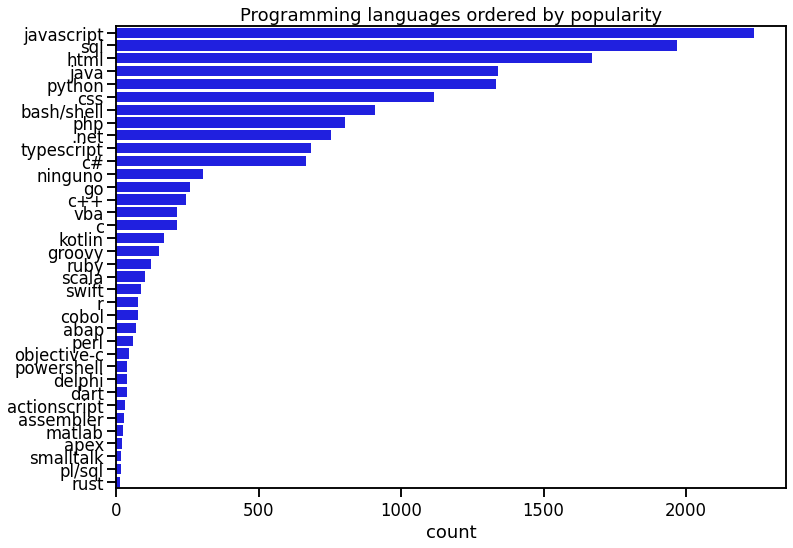

In [18]:
fig = plt.figure(figsize=(12,8.5))
sns.countplot(data=df_cured,y='programming_language', color='blue',\
             order=df_cured['programming_language'].value_counts().index)
plt.title('Programming languages ordered by popularity')
plt.ylabel('');

A partir de este gráfico podemos hacer algunos comentarios. Primero vemos que los primeros 11 lenguajes son muy populares en comparación con los otros teniendo mas de 500 counts cada uno.

 Segundo. Si comparamos este gráfico con los lenguajes más populares extraídos de otra fuente (por ejemplo https://pypl.github.io/PYPL.html) podemos ver que los diez lenguajes más populares en ambos casos coinciden en general salvo algunas excepciones como es el caso de bash/shell. En nuestro caso, bash/shell es un lenguaje muy popular (aproximadamente 1000 counts) y en la fuente citada no aparece siquiera en el top 28 de lenguajes más populares.

$----------------------------------------------------------$

3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Recordemos la pregunta original: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?
Una forma de responder la pregunta sería através de un gráfico lenguaje vs salario_promedio, y organizarlos
desde los lenguajes asociados a salarios más altos hasta los más bajos. Agregamos además la desviación estándar.

<Figure size 864x612 with 0 Axes>

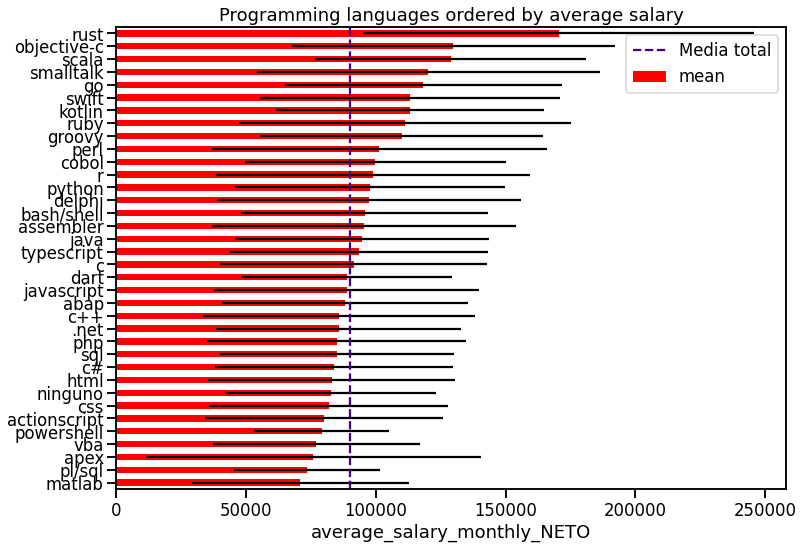

In [19]:
fig = plt.figure(figsize=(12,8.5))
groups.sort_values('mean', ascending=True).plot(kind = "barh", y = "mean", legend = False, 
          xerr = "std", color='red',figsize=(12,8.5))
plt.ylabel('');
plt.xlabel('average_salary_monthly_NETO')
plt.title('Programming languages ordered by average salary')

plt.axvline(df_cured['salary_monthly_NETO'].mean(), color='indigo',
            linestyle='--', label='Media total')

plt.legend()

En base a este gráfico podemos señalar varias cosas: 
* Podemos ver por ejemplo que los que programan en 'rust' ganan por encima de la media total de todos los salarios (línea vertical azul a trazos) con 1-sigma de precisión. Para todos los demás lenguajes dentro de 1-sigma abarcan a la media total.
* Vemos que la desviación estándar para cada lenguaje (línea negra sólida horizontal) es bastante grande lo que nos dice que tenemos bastante volatilidad en nuestros datos
* Los primeros lenguajes ordendos por salario medio (rust, objective-c, scale, etc) no son los lenguajes más populares. Una posible explicación sería que para estos lenguajes asociados a los mejores salarios no tenemos suficientes muestras y por lo tanto, el salario promedio podría no ser representativo. Tal vez, en esta muestra sólo tengamos programadores que cobran en dólares o lleven muchos años trabajando en su empresa.

$----------------------------------------------------------$

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) son útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.

In [20]:
interesting_columns = ["profile_years_experience","salary_monthly_BRUTO","salary_monthly_NETO"\
                       ,"profile_gender","profile_studies_level"]
df_selected = df[interesting_columns]
df_selected.head(3)

,profile_years_experience,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_studies_level
0,3.0,53000.0,43000.0,Mujer,Universitario
1,5.0,79000.0,63000.0,Hombre,Universitario
2,2.0,160000.0,127000.0,Mujer,Secundario


2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Para decidir cuáles filas son relevantes para el análisis primero debemos explorar los datos

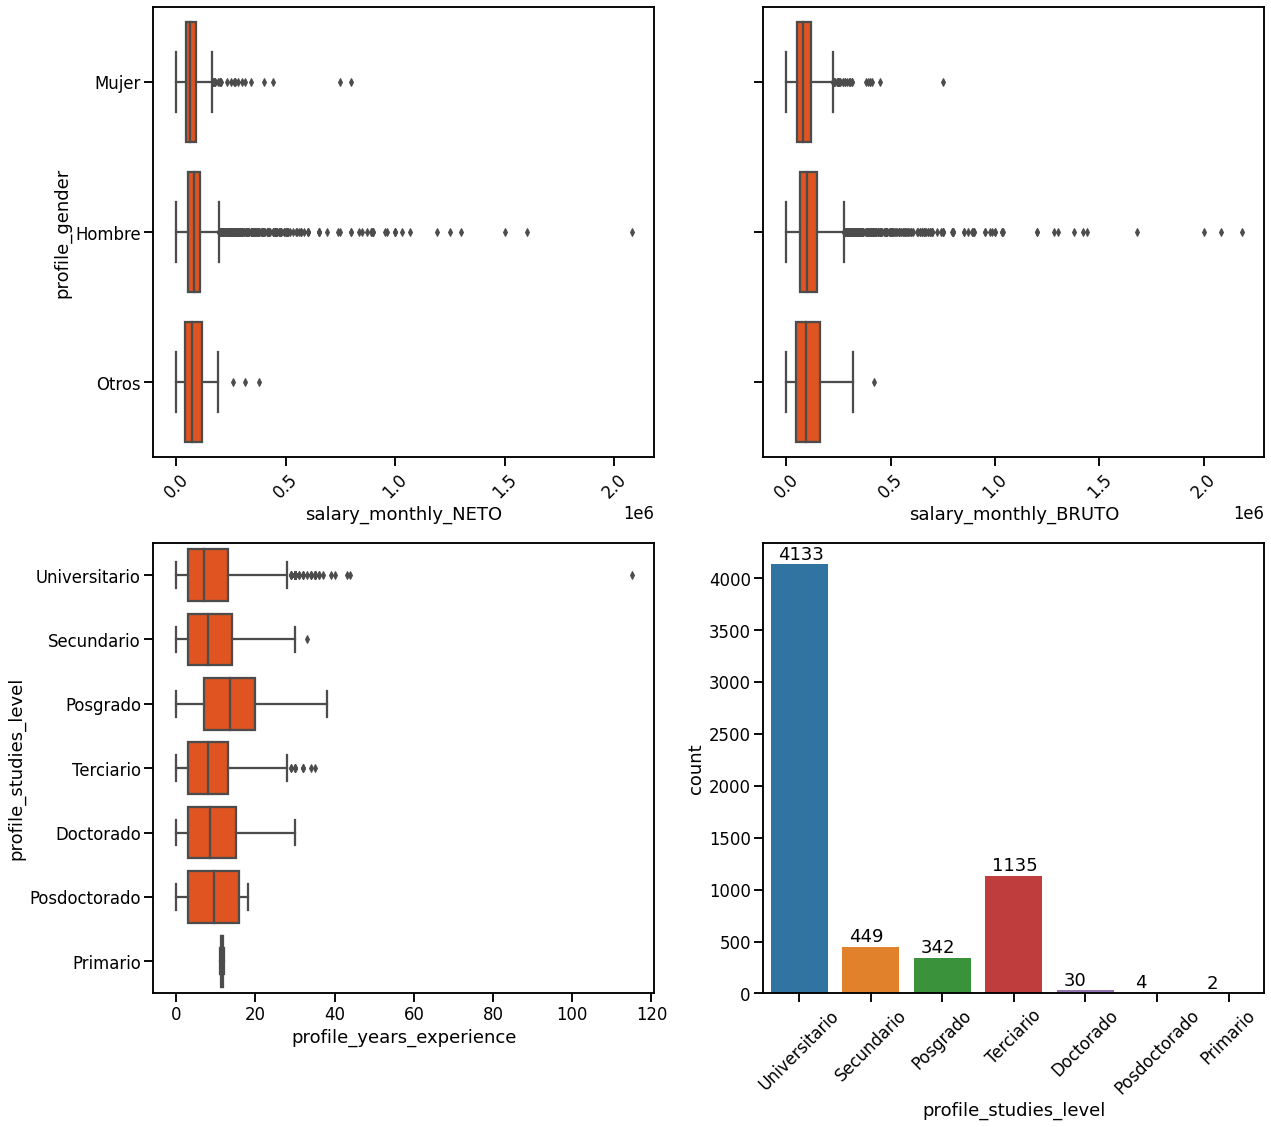

In [21]:
# exploramos los datos

fig, axes = plt.subplots(2, 2,figsize=(18,16))

sns.boxplot(data=df_selected, x='salary_monthly_NETO', y='profile_gender'\
            ,color='orangered',ax=axes[0,0])
sns.boxplot(data=df_selected, x='salary_monthly_BRUTO', y='profile_gender'\
            ,color='orangered',ax=axes[0,1])

sns.boxplot(data=df_selected, x='profile_years_experience', y='profile_studies_level',\
            color='orangered',ax=axes[1,0])

ax0 = sns.countplot(data=df_selected,x='profile_studies_level',ax=axes[1,1])

axes[0][0].tick_params(axis='x', rotation=45)
axes[0][1].tick_params(axis='x', rotation=45)    
axes[1][1].tick_params(axis='x', rotation=45)

axes[0,1].set_ylabel('')
axes[0,1].set(yticklabels=[])

fig.tight_layout()

for p in ax0.patches:
        ax0.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

De este conjunto de gráficos vemos lo siguiente:
* Tenemos gente que gana un salario muy bajo, incluso \$0.
* Tenemos gente que gana por encima de \$1000000 tanto en salario neto como en bruto.
* Tenemo gente con más de 100 años de experiencia.
* En los niveles de estudio, tenemos dos categorías, 'Posdoctorado' y 'Primario' que tienen sólo 2 y 4 counts, respectivamente.

En base a esto decidimos limpiar nuestro data set de la siguiente forma.

In [22]:
# limpieza de datos

# limpiamos los outliers del salario neto y bruto quedándonos sólo aquellos que están dentro de 2.5-sigma,
# lo cual equivale a más del 95% de los datos
df_selected = clean_outliers_sd(df_selected, 'salary_monthly_NETO',k=2.5)
df_selected = clean_outliers_sd(df_selected, 'salary_monthly_BRUTO',k=2.5)

# limpiamos los outliers de los años de experiencia a 3-sigma
df_selected = clean_outliers_sd(df_selected, 'profile_years_experience',k=3.0)

# eliminamos los niveles de estudios 'Posdoctorado' y 'Primario' por tener muy pocos counts
df_selected = df_selected.drop(df_selected[(df_selected.profile_studies_level == "Primario") | \
                             (df_selected.profile_studies_level == "Posdoctorado")].index)

# eliminamos las filas que tienen un salario menor a $20000, tanto bruto como neto
df_selected = df_selected[(df_selected['salary_monthly_NETO']>20000) \
                          & (df_selected['salary_monthly_BRUTO']>20000)]

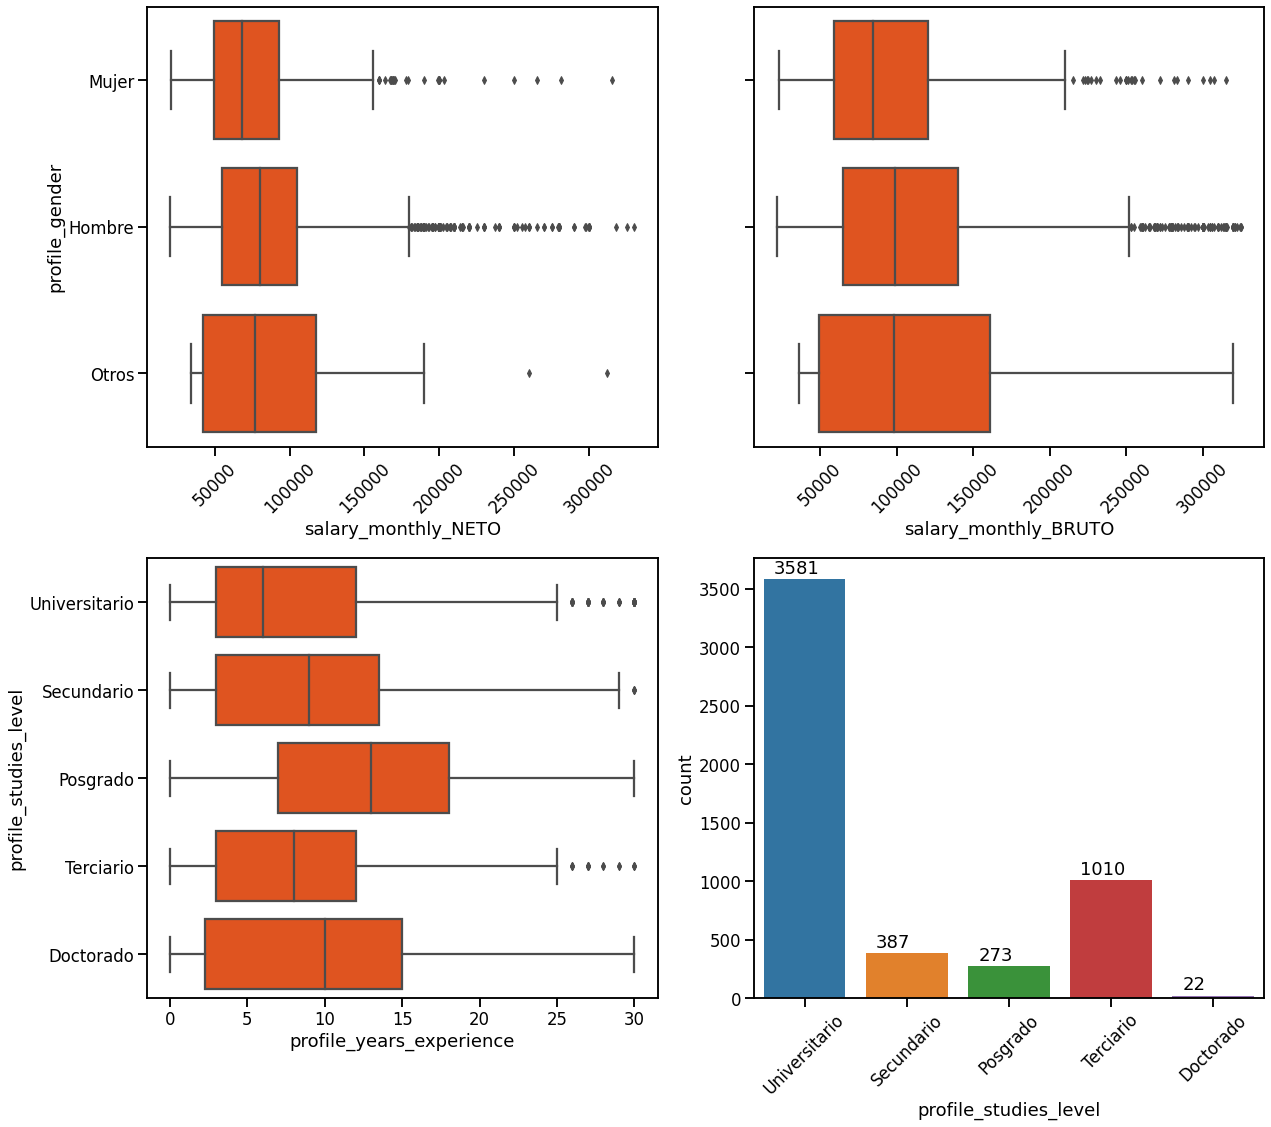

In [23]:
# vemos cómo quedaron los datos curados

fig, axes = plt.subplots(2, 2,figsize=(18,16))

sns.boxplot(data=df_selected, x='salary_monthly_NETO', y='profile_gender'\
            ,color='orangered',ax=axes[0,0])
sns.boxplot(data=df_selected, x='salary_monthly_BRUTO', y='profile_gender'\
            ,color='orangered',ax=axes[0,1])

sns.boxplot(data=df_selected, x='profile_years_experience', y='profile_studies_level',\
            color='orangered',ax=axes[1,0])

ax = sns.countplot(data=df_selected,x='profile_studies_level',ax=axes[1,1])

axes[0][0].tick_params(axis='x', rotation=45)
axes[0][1].tick_params(axis='x', rotation=45)    
axes[1][1].tick_params(axis='x', rotation=45)

axes[0,1].set_ylabel('')
axes[0,1].set(yticklabels=[])

fig.tight_layout()

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

En estos gráficos vemos cómo quedaron nuestras columnas de interés luego de la curación.

$----------------------------------------------------------$

## a) Densidad conjunta

1- Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

R: las herramientas que podemos utulizar son: jointplot para variable numéricas, la cual nos muestra la distribución de cada variable y además nos muestra si tenemos alguna correlación entre las mismas. Por otro lado para las variables categóricas podemos usar un heatmap para ver su distribución.

2- Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

R:Variables:
* Numéricas: `salary_monthly_BRUTO`, `salary_monthly_NETO` y `profile_years_experience`.
* Categóricas: `profile_gender` y `profile_studies_level`.


Visualizamos la distribución de las columnas de interés y posibles correlaciones entre ellas

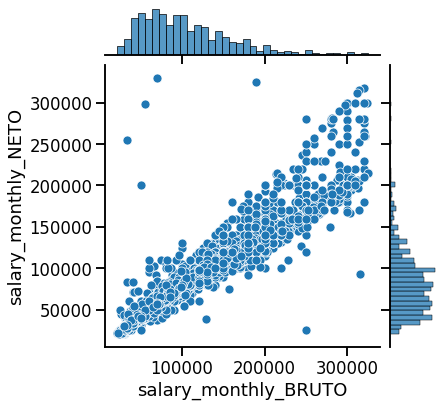

In [24]:
sns.jointplot(
    data=df_selected,
    x="salary_monthly_BRUTO", y="salary_monthly_NETO")

Vemos que claramente existe una correlación entre ambas variables, a medida que aumenta una aumenta la otra.
Por otro lado podemos ver que hay gente que tiene un salario neto muy alto y un neto muy bajo, y viceversa. Lo cual no tiene demasiado sentido salvo que parte de su salario no esté declarado.

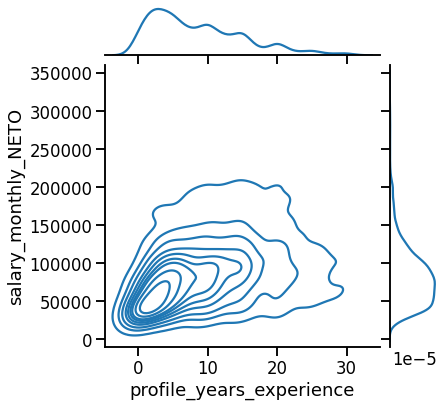

In [25]:
sns.jointplot(
    data=df_selected,
    x="profile_years_experience", y="salary_monthly_NETO",kind='kde')

Acá comparamos la distribución del salario neto vs los años de experiencia. Decidimos utilizar el argumento `kind='kde'` simplemente para mostrar la densidad de probabilidad de las variables y no el histograma. No podemos ver ninguna correlación entre ambas variables.

Por último un gráfico `salary_monthtl_BRUTO` vs `profile_years_experience` sería redundante pues ya vimos que `salary_monthtl_BRUTO` y `salary_monthtl_BRUTO` están correlacionados.

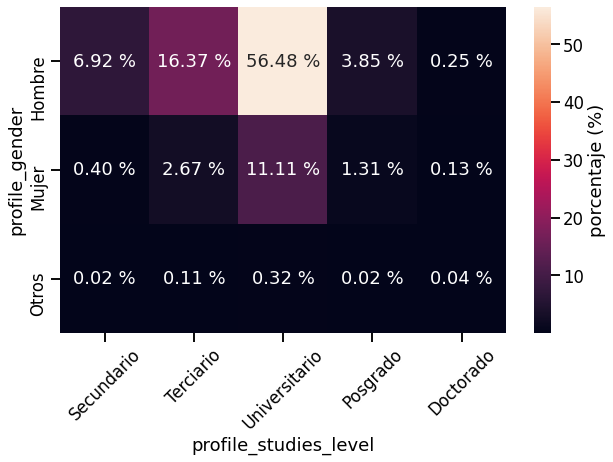

In [26]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado']
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_selected.profile_gender,
                  df_selected.profile_studies_level,normalize=True)[sorted_studies_levels]*100
ax = sns.heatmap(exp, annot=True,cbar_kws={'label': 'porcentaje (%)'}, fmt='.2f')
for t in ax.texts: t.set_text(t.get_text() + " %")

ax.tick_params(axis='x', rotation=45)

Este gráfico muestra el porcentaje de la muestra discriminados por género y por nivel de estudio alcanzado sobre el total a fin de ver cómo están distribuidos los dátos de estas dos variables categóricas de interés.

Podemos señalar lo siguiente:
* La mayoría de la muestra corresponde a hombres.
* El 56% de la muestra son hombres que alcanzaron el nivel Universitario.
* El nivel de estudio alcanzado en general es el Universitario, tanto para hombre como para mujeres y otros
* El género otros ocupa un lugar mínimo dentro de la muestra.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

R: Para ver la correlación podemos hacer un jointplot como describimos anteriormente entre estas dos variables.
La medida estadística que utilizaremos será la correlación.

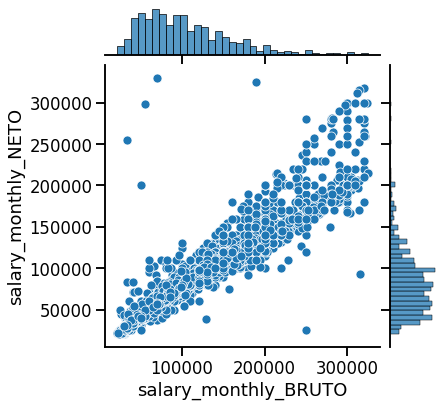

In [27]:
sns.jointplot(
    data=df_selected,
    x="salary_monthly_BRUTO", y="salary_monthly_NETO")

Como discutimos anteriormente, podemos ver que ambas variables están correlacionadas y por lo tanto podemos excluir cualquiera de las dos columnas de nuestro data set porque contienen la misma información.

In [28]:
# calculamos la correlacion
corr_bruto_neto = df_selected.salary_monthly_BRUTO.corr(df_selected.salary_monthly_NETO)
print('Correlación:',corr_bruto_neto)

print('Como el valor de la correlación es cercano a 1 podemos asegurar \nque ambas variables están fuertemente correlacionadas')

Correlación: 0.9459682036079878
Como el valor de la correlación es cercano a 1 podemos asegurar 
que ambas variables están fuertemente correlacionadas


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






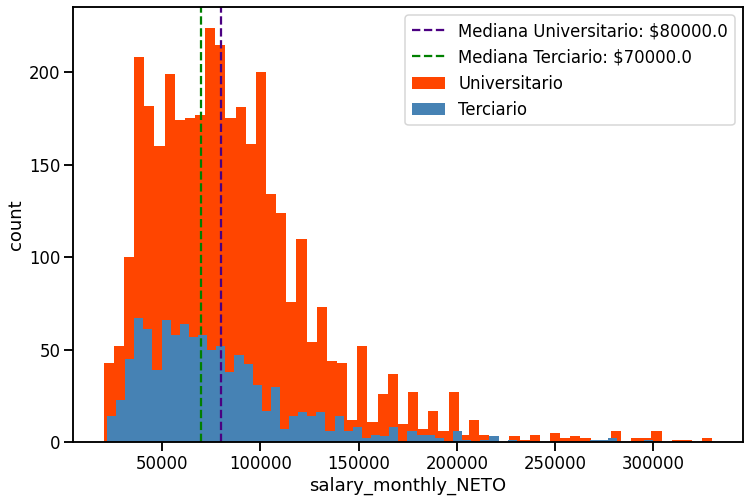

In [29]:
fig = plt.figure(figsize=(12,8))
df_uni = df_selected[df_selected["profile_studies_level"]=="Universitario"]#.reset_index()
df_ter = df_selected[df_selected["profile_studies_level"]=="Terciario"]#.reset_index()

plt.hist(df_uni.salary_monthly_NETO,color='orangered',bins=60,label='Universitario')
plt.hist(df_ter.salary_monthly_NETO,color='steelblue',bins=60,label='Terciario')

plt.xlabel('salary_monthly_NETO')
plt.ylabel('count')

mediana_uni = df_uni['salary_monthly_NETO'].median()
mediana_ter = df_ter['salary_monthly_NETO'].median()

plt.axvline(mediana_uni, color='indigo', linestyle='--', label=f'Mediana Universitario: ${mediana_uni}')
plt.axvline(mediana_ter, color='green', linestyle='--', label=f'Mediana Terciario: ${mediana_ter}')

plt.legend()
plt.show()

Graficamos de forma comparativa el histograma de las subpoblaciones `Universitario` y `Terciario` y vemos que la mediana de los Universitario es mayor que la mediana de los Terciarios.

Las subpoblaciones Universitario y Terciario son posibles valores que puede tomar la variable categórica `profile_studies_level`. Lo que podemos analizar es qué probabilidad hay de cobrar por encima de la media (incluyendo todas los niveles de estudio) siendo Universitario y siendo Terciario. Lo hacemos a continuación.

In [30]:
mean_selected = df_selected.salary_monthly_NETO.mean()
print('Media del salario NETO total: $',np.round(mean_selected,2))

is_above_avg = df_selected["salary_monthly_NETO"] > mean_selected
len_uni_average = len(df_selected[(df_selected["profile_studies_level"]=="Universitario") & is_above_avg])
len_uni = len(df_selected[df_selected["profile_studies_level"]=="Universitario" ])

p_uni = np.round(len_uni_average/len_uni*100,2)

len_ter_average = len(df_selected[(df_selected["profile_studies_level"]=="Terciario") & is_above_avg])
len_ter = len(df_selected[df_selected["profile_studies_level"]=="Terciario" ])

p_ter = np.round(len_ter_average/len_ter*100,2)

print(f'Probabilidad de ganar por encima de la media siendo Universitario: {p_uni}%')
print(f'Probabilidad de ganar por encima de la media siendo Terciario: {p_ter}%')

print('Por lo tanto hay más probabilidad de ganar por encima de la media siendo Universitario.')

Media del salario NETO total: $ 84569.03
Probabilidad de ganar por encima de la media siendo Universitario: 45.13%
Probabilidad de ganar por encima de la media siendo Terciario: 34.26%
Por lo tanto hay más probabilidad de ganar por encima de la media siendo Universitario.


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='profile_years_experience'>

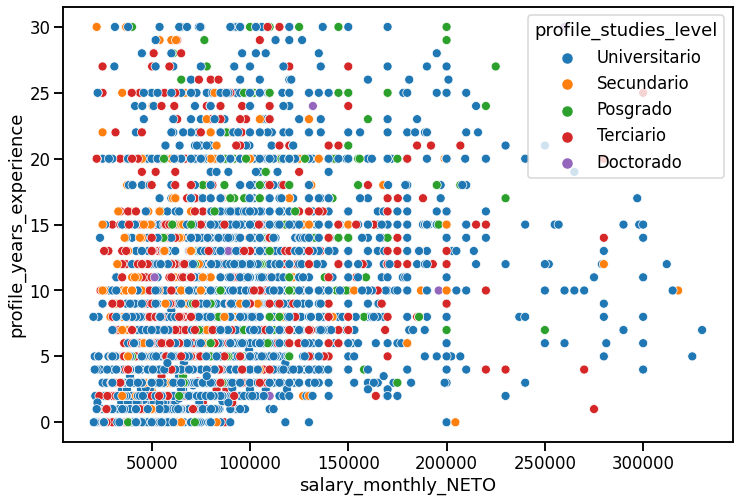

In [31]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.profile_years_experience,\
                hue=df_selected.profile_studies_level)


<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='profile_years_experience'>

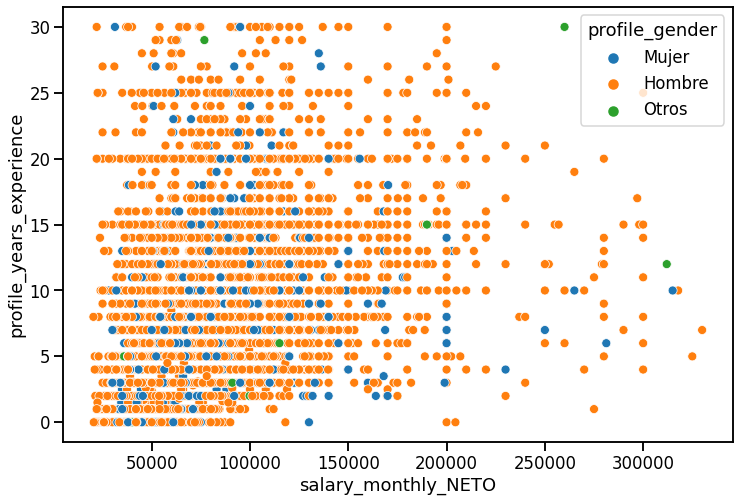

In [32]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.profile_years_experience,\
                hue=df_selected.profile_gender)

A partir de los dos gráficos anteriores ( `profile_years_experience` vs `salary_monthly_NETO` y `profile_years_experience` vs `salary_monthly_NETO`) vemos que no hay ninguna correlación tanto para la muestra completa como para la misma dicriminada por género y por nivel de estudio, respectivamente.

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='salary_monthly_BRUTO'>

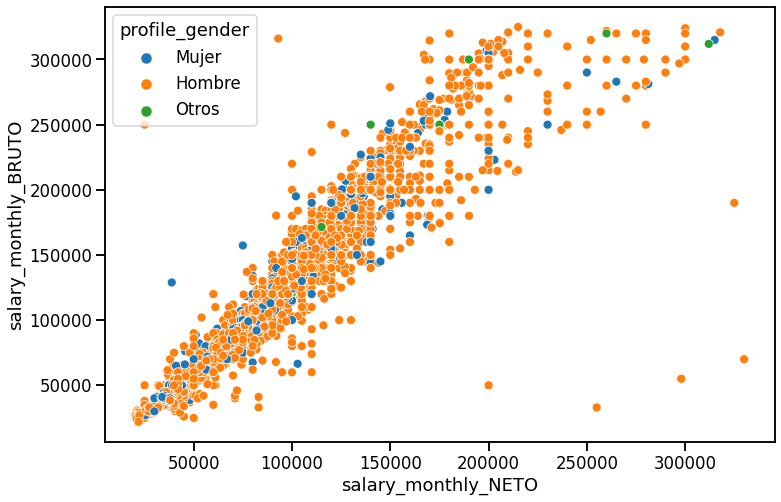

In [33]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=df_selected.salary_monthly_NETO,y=df_selected.salary_monthly_BRUTO,\
                hue=df_selected.profile_gender)

En este gráfico vemos nuevamente que las variables `salary_monthly_NETO` y `salary_monthly_BRUTO` están correlacionadas incluso cuando discriminamos por hombres y por mujeres. Para otros géneros tenemos muy pocos valores y por lo tanto no podemos asegurar correlación alguna para esta subpoblación.